In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
#function to generate data and run ftrl algorithm
def analyze(dimension, num_points, learning_rate=.01, noise=1.0):
    h_star = np.random.randint(10, 20, dimension)
    regrets = np.zeros((num_points))
    regret = 0.
    
    print "Dimension:{}, Num_Points:{}, Learning_Rate:{}, Noise:{})".format(dimension,num_points,learning_rate,noise)
    print "True h: " + str(h_star)
    # inner function for generating data point
    def gen_point(n):
        x_i = np.random.uniform(size=dimension)
        y_i = np.dot(h_star, x_i) + np.random.normal(scale=noise)
        return (x_i,y_i)
    
    # generation num_points of data points
    data_points = map(gen_point, xrange(num_points))
    
    # online gradient descent
    h = np.zeros((dimension))
    for idx in xrange(num_points):
        x,y = data_points[idx]
        y_est = np.dot(h, x)
        diff = y-y_est
        for i in range(dimension):
            # derivative of loss function w.r.t. h(i)
            # d(y-h*x)^2/d(h(i)) = -2(y-h*x)x(i)
            h[i] += 2*learning_rate*diff*x[i]
        regret += (np.power(diff, 2) - np.power(np.dot(h_star, x) - y, 2))
        regrets[idx] = regret/(idx+1)
    print "Estimated h: " + str(h)
    return regrets

Dimension:2, Num_Points:1000, Learning_Rate:0.01, Noise:1.0)
True h: [13 15]
Estimated h: [ 13.18878647  14.7747066 ]
Dimension:5, Num_Points:1000, Learning_Rate:0.01, Noise:1.0)
True h: [15 18 16 13 17]
Estimated h: [ 15.32509858  17.56400127  15.952565    13.53388708  16.79574317]
Dimension:50, Num_Points:1000, Learning_Rate:0.01, Noise:1.0)
True h: [12 17 19 18 11 18 16 15 12 12 16 18 11 16 16 12 17 16 11 19 11 18 18 14 12
 10 10 16 14 18 10 12 12 12 14 12 19 10 14 13 17 15 18 19 15 10 15 11 19 11]
Estimated h: [ 11.11543825  16.17088259  18.37076283  17.51247662  12.15354489
  17.74799679  15.23195102  15.77127116  13.58497147  12.20104899
  15.47152046  16.66540608  11.34345636  14.94848379  14.67335735
  13.96540731  16.23196691  16.33129036  11.84678334  18.06126532
  11.49389433  17.61940655  16.75089125  14.19823518  11.51773127
  10.73348984  11.44686908  15.08667558  13.64012584  17.41769842
  10.83734563  12.37628819  13.13595895  12.59029308  14.24873391
  13.07835697  19.

/Users/charlesliu/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


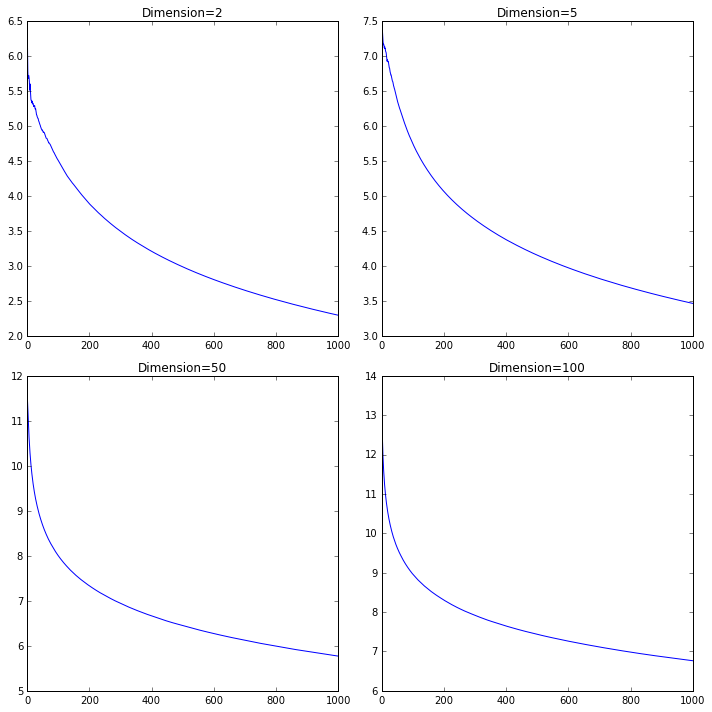

In [3]:
# look at regret over dimensions
dimensions = [2,5,50,100]
# assume 1000 data points
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10), 
                         tight_layout=True)
for ax, dimension in zip(axes.ravel(), dimensions):
    regrets = analyze(dimension, 1000)
    ax.plot(np.log(regrets))
    ax.set_title("Dimension={}".format(dimension))

We see as clearly that as there are more dimensions added, the regret overall is higher

Dimension:2, Num_Points:50, Learning_Rate:0.01, Noise:1.0)
True h: [10 14]
Estimated h: [ 5.06617914  6.28352331]
Dimension:2, Num_Points:100, Learning_Rate:0.01, Noise:1.0)
True h: [14 16]
Estimated h: [  9.9603149   10.25278327]
Dimension:2, Num_Points:500, Learning_Rate:0.01, Noise:1.0)
True h: [15 16]
Estimated h: [ 14.95708531  15.73979684]
Dimension:2, Num_Points:1000, Learning_Rate:0.01, Noise:1.0)
True h: [19 16]
Estimated h: [ 18.93094616  16.00737502]


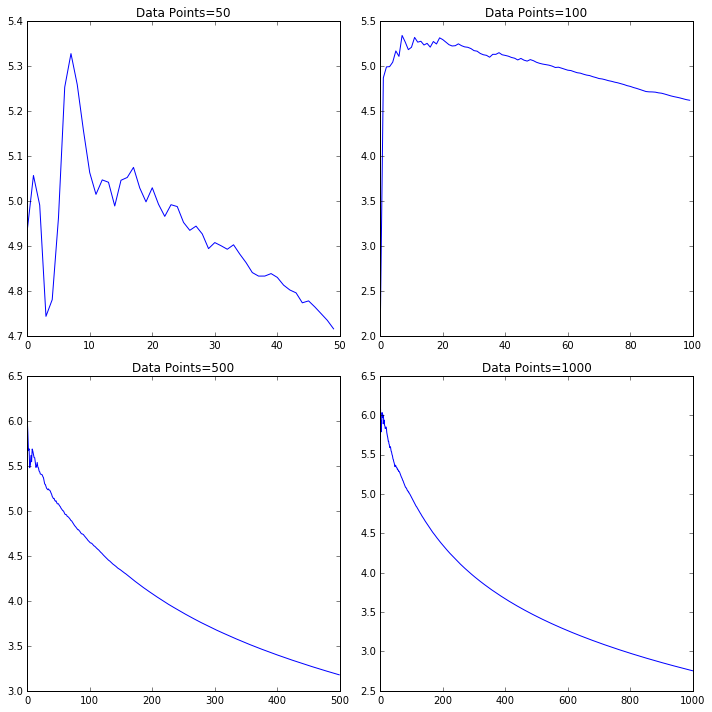

In [4]:
# look at regret over data points
# assume 2 dimensions
num_points = [50, 100, 500, 1000]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), 
                         tight_layout=True)
for ax, num_point in zip(axes.ravel(), num_points):
    regrets = analyze(2, num_point)
    ax.plot(np.log(regrets))
    ax.set_title("Data Points={}".format(num_point))

The lower the number of data points used clearly the noisier it is. I'm not sure after a certain number of points there will be any noticeablely better convergence, seems to converge well under this model

Dimension:2, Num_Points:1000, Learning_Rate:0.01, Noise:1)
True h: [16 11]
Estimated h: [ 15.34720657  11.45966799]
Dimension:2, Num_Points:1000, Learning_Rate:0.01, Noise:5)
True h: [18 17]
Estimated h: [ 17.47920885  17.3543276 ]
Dimension:2, Num_Points:1000, Learning_Rate:0.01, Noise:10)
True h: [18 18]
Estimated h: [ 17.09534785  17.06822647]
Dimension:2, Num_Points:1000, Learning_Rate:0.01, Noise:50)
True h: [13 11]
Estimated h: [ 14.05494471  15.09924041]


/Users/charlesliu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log


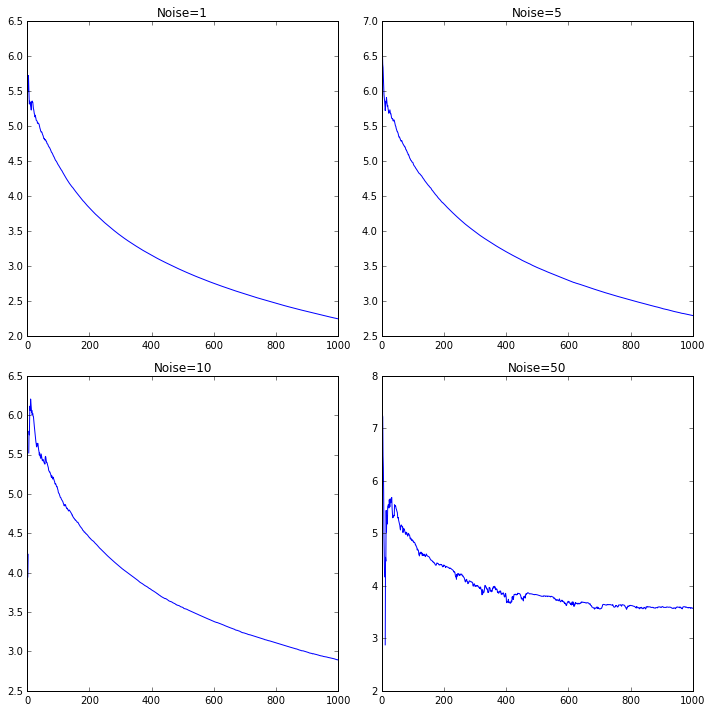

In [5]:
# look at regret over noisiness
# assume 2 dimensions, 1000 points
noisiness = [1, 5, 10, 50]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), 
                         tight_layout=True)
for ax, noise in zip(axes.ravel(), noisiness):
    regrets = analyze(2, 1000, noise=noise)
    ax.plot(np.log(regrets))
    ax.set_title("Noise={}".format(noise))

As expected, noise reduces the accuracy of the algorithm, though after 1000 iterations it's still not terrible for large noise

Dimension:2, Num_Points:1000, Learning_Rate:0.01, Noise:1.0)
True h: [19 18]
Estimated h: [ 18.87932223  18.01408499]
Dimension:2, Num_Points:1000, Learning_Rate:0.05, Noise:1.0)
True h: [14 19]
Estimated h: [ 13.54740927  19.15701525]
Dimension:2, Num_Points:1000, Learning_Rate:0.5, Noise:1.0)
True h: [14 14]
Estimated h: [ 14.6052487   14.18923862]
Dimension:2, Num_Points:1000, Learning_Rate:1, Noise:1.0)
True h: [10 12]
Estimated h: [  6.58526706  12.57449071]


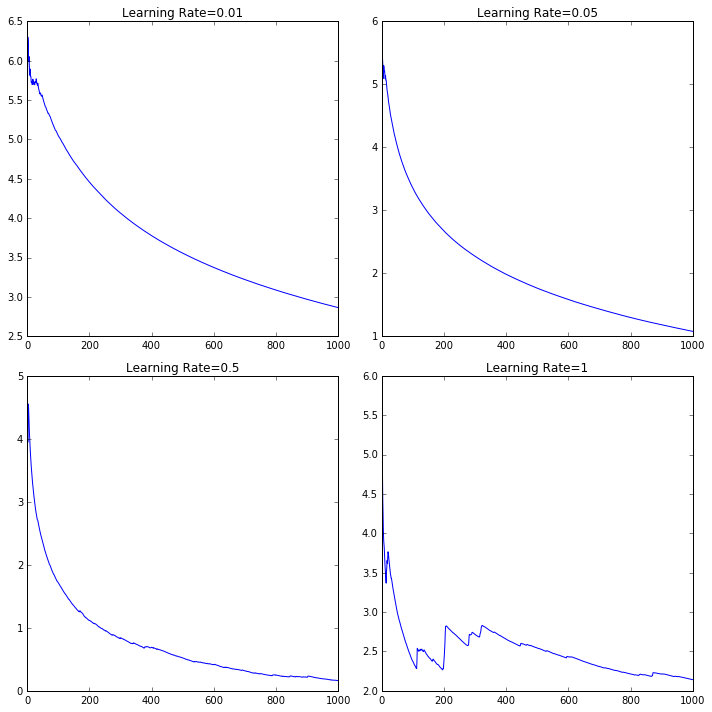

In [7]:
# look at regret over learning rate
# assume 2 dimensions, 1000 points
learning_rates = [.01, .05, .5, 1]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), 
                         tight_layout=True)
for ax, lr in zip(axes.ravel(), learning_rates):
    regrets = analyze(2, 1000, learning_rate=lr)
    ax.plot(np.log(regrets))
    ax.set_title("Learning Rate={}".format(lr))

The learning rate seems to be very data dependent - clearly 1 is too large but otherwise the perfect learning rate changes depending on your data